In [1]:
from mdu.vqr.cpflow.functions import CPFlowOrdering

cpflow = CPFlowOrdering(
    dimx=2,
    hidden_dim=8,
    num_hidden_layers=5,
    nblocks=12,
    zero_softplus=False,
    softplus_type="softplus",
    symm_act_first=False,
)

/home/nkotelevskii/github/multidimensional_uncertainty/.venv/lib/python3.12/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


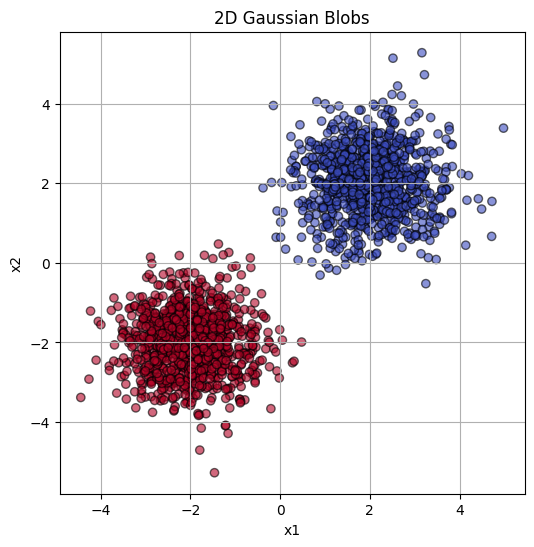

In [2]:
import torch
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(0)

# Parameters for blobs
n_samples = 1000
centers = torch.tensor([[2.0, 2.0], [-2.0, -2.0]])
std = 0.8

# Generate samples for each blob
X0 = torch.randn(n_samples, 2) * std + centers[0]
X1 = torch.randn(n_samples, 2) * std + centers[1]

# Stack and create labels
X = torch.cat([X0, X1], dim=0)
y = torch.cat([torch.zeros(n_samples), torch.ones(n_samples)])

# Visualize
plt.figure(figsize=(6, 6))
plt.scatter(X[:, 0], X[:, 1], c=y, cmap="coolwarm", alpha=0.6, edgecolor="k")
plt.title("2D Gaussian Blobs")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [3]:
cpflow.fit(
    scores_cal=X,
    train_params={
        "lr": 1e-2,
        "num_epochs": 15,
        "batch_size": 32,
    },
)

/home/nkotelevskii/github/multidimensional_uncertainty/mdu/vqr/cpflow/functions.py:66: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(scores_cal, dtype=torch.float32, device=self.device),
  0%|          | 0/15 [00:00<?, ?it/s]

init loss: -15.978080749511719
10 -15.799093914031982
20 -31.66189842224121
30 -47.448565769195554
40 -63.23008890151978
50 -79.00951328277588
60 -94.81482372283935


  7%|▋         | 1/15 [00:20<04:53, 20.96s/it]

70 -110.57452955245972
80 -126.30210428237915
90 -142.098929977417
100 -157.70454692840576
110 -173.10656938552856
120 -188.64079895019532


 13%|█▎        | 2/15 [00:42<04:34, 21.12s/it]

130 -204.1081196784973
140 -219.54614572525026
150 -235.0967812538147
160 -250.60096645355225
170 -266.0425440788269
180 -281.5379534721375


 20%|██        | 3/15 [01:03<04:13, 21.13s/it]

190 -297.0967637062073
200 -312.62612495422366
210 -328.2088399887085
220 -343.7032819747925
230 -359.33554048538207
240 -374.95417003631593
250 -390.5657736778259


 27%|██▋       | 4/15 [01:24<03:52, 21.14s/it]

260 -406.2409475326538
270 -421.86717414855957
280 -437.5572496414185
290 -453.4131834983826
300 -469.0881462097168
310 -484.7271560668945


 33%|███▎      | 5/15 [01:46<03:32, 21.29s/it]

320 -500.40933141708376
330 -516.0998177528381
340 -531.7729956626893
350 -547.2913918495178
360 -562.9468707084656
370 -578.5966727256775


 40%|████      | 6/15 [02:07<03:13, 21.48s/it]

380 -594.2560813903808
390 -609.9427213668823
400 -625.5472023963928
410 -641.0291478157044
420 -656.4418123245239
430 -671.8586656570435
440 -687.2438304901123


 47%|████▋     | 7/15 [02:29<02:51, 21.44s/it]

450 -702.6578952789307
460 -718.1945436477661
470 -733.6179790496826
480 -749.1995535850525
490 -764.6014915466309
500 -780.0308245658874


 53%|█████▎    | 8/15 [02:50<02:30, 21.49s/it]

510 -795.5481201171875
520 -810.9820524215698
530 -826.4852764129639
540 -841.9211943626403
550 -857.351180934906
560 -872.7888387680053


 60%|██████    | 9/15 [03:12<02:09, 21.53s/it]

570 -888.2645610809326
580 -903.7450194358826
590 -919.194359588623
600 -934.6104489326477
610 -950.1108666419983
620 -965.503216457367


 67%|██████▋   | 10/15 [03:34<01:48, 21.64s/it]

630 -981.1154828071594
640 -996.4850751876832
650 -1011.8807757377624
660 -1027.4921961784362
670 -1042.9065178871156
680 -1058.4405692100524
690 -1073.9511996269225


 73%|███████▎  | 11/15 [03:56<01:27, 21.77s/it]

700 -1089.4721702575685
710 -1104.9655115127564
720 -1120.4621110916137
730 -1135.8838695526124
740 -1151.2533418655396
750 -1166.826208114624


 80%|████████  | 12/15 [04:18<01:05, 21.78s/it]

760 -1182.3294629096986
770 -1197.7360030174254
780 -1213.191267299652
790 -1228.657874584198
800 -1244.024007320404
810 -1259.4512442588807


 87%|████████▋ | 13/15 [04:39<00:43, 21.78s/it]

820 -1274.9015433311463
830 -1290.3947299957276
840 -1305.8013283729554
850 -1321.2044796943665
860 -1336.6784445762635
870 -1352.063665676117
880 -1367.4731061935424


 93%|█████████▎| 14/15 [05:01<00:21, 21.79s/it]

890 -1382.936584377289
900 -1398.3397989273071
910 -1413.6870040893555
920 -1429.115340614319
930 -1444.5589146614075
940 -1460.0020277023316


100%|██████████| 15/15 [05:23<00:00, 21.58s/it]


In [4]:
# Sample from 2D standard Gaussian
n_samples_gauss = 1000
gauss_samples = torch.randn(n_samples_gauss, 2, device="cuda:0")

In [5]:
with torch.no_grad():
    cpflow.flow.eval()
    for f in cpflow.flow.flows[1::2]:
        f.no_bruteforce = False
    z = cpflow.flow.reverse(gauss_samples)
    pushforward_of_u = z.cpu()

/home/nkotelevskii/github/multidimensional_uncertainty/third_party/cp-flow/lib/flows/cpflows.py:219: UserWarning: brute force
  warnings.warn("brute force")


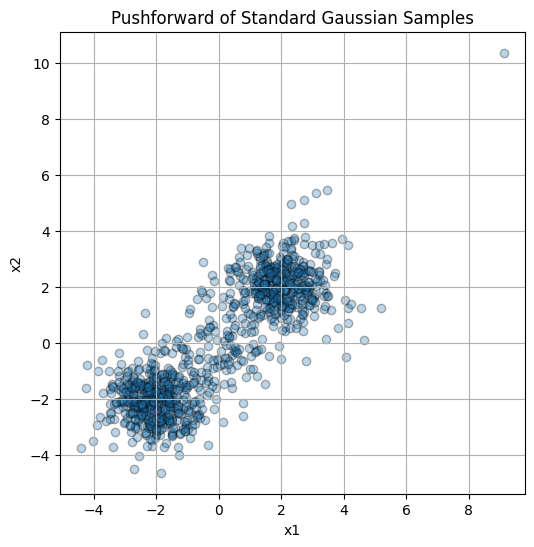

In [6]:
plt.figure(figsize=(6, 6))
plt.scatter(pushforward_of_u[:, 0], pushforward_of_u[:, 1], alpha=0.3, edgecolor="k")
plt.title("Pushforward of Standard Gaussian Samples")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()

In [ ]:
with torch.no_grad():
    cpflow.flow.eval()
    for f in cpflow.flow.flows[1::2]:
        f.no_bruteforce = False
    z_, _ = cpflow.flow.forward_transform(
        torch.tensor(X.to("cuda:0"), dtype=torch.float32),
        context=None,
    )
    pushforward_of_u = z_.cpu()

/tmp/ipykernel_1519635/3041039001.py:6: UserWarning: To copy construct from a tensor, it is recommended to use sourceTensor.detach().clone() or sourceTensor.detach().clone().requires_grad_(True), rather than torch.tensor(sourceTensor).
  torch.tensor(X.to("cuda:0"), dtype=torch.float32),


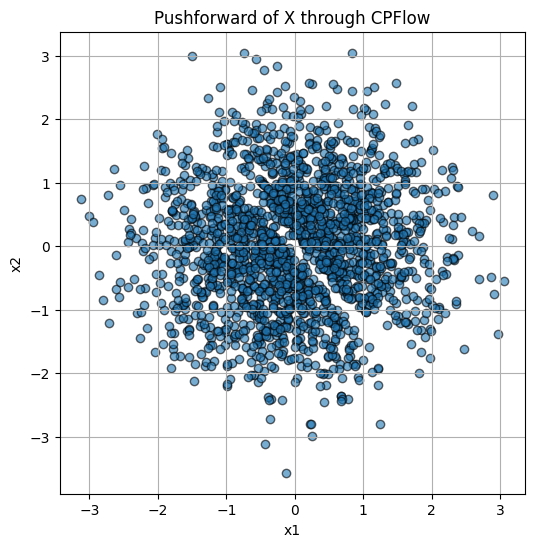

In [8]:
plt.figure(figsize=(6, 6))
plt.scatter(pushforward_of_u[:, 0], pushforward_of_u[:, 1], alpha=0.6, edgecolor="k")
plt.title("Pushforward of X through CPFlow")
plt.xlabel("x1")
plt.ylabel("x2")
plt.grid(True)
plt.show()